# Load Data

In [1]:
import os
import pandas as pd
import numpy as np


def load_data(path):
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    use_cols = ['age1',
                'land', 
                'cvl00', 'cvl01', 'cvl02', 'cvl03',
                'cvl10', 'cvl11', 'cvl12', 'cvl13',
                'labch', 'labh_hour', 'lab_cost',
                'fmtc', 'lansh',
                'size', 'ara', 'de2',# catecorical variable
                'cony'] # dependent variable

    dataframe_list = []
    for year in years[:7]:
        file_path1 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀1).xlsx')
        file_path2 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀2).xlsx')
        
        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_data = pd.concat([forest_data1, forest_data2], axis=1)
        dataframe_list.append(forest_data.loc[:,use_cols])
        print(year, forest_data.shape)
    
    for year in years[7:9]:
        file_path1 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀 1).xls')
        file_path2 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀 2).xls')
        
        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_data = pd.concat([forest_data1, forest_data2], axis=1)
        dataframe_list.append(forest_data.loc[:,use_cols])
        print(year, forest_data.shape)
    
    
    file_path = os.path.join(path, str(years[9])+'년', str(years[9])+'년 임산물생산비조사_통합 데이터_1. 밤.xlsx')
    forest_2019 = pd.read_excel(file_path)
    dataframe_list.append(forest_2019.loc[:,use_cols])
    print(2019, forest_2019.shape)
    
    data = pd.concat(dataframe_list, axis=0)
    
    return data
    
data = load_data('./임산물생산비조사 마이크로데이터(2010-2019)')

2010 (216, 416)
2011 (209, 416)
2012 (216, 416)
2013 (220, 416)
2014 (255, 416)
2015 (258, 416)
2016 (252, 416)
2017 (253, 416)
2018 (231, 416)
2019 (226, 432)


In [2]:
data

,age1,land,cvl00,cvl01,cvl02,cvl03,cvl10,cvl11,cvl12,cvl13,labch,labh_hour,lab_cost,fmtc,lansh,size,ara,de2,cony
0,70,320704.4848,19.54,0.0,0.0,19.54,19.54,0.0,0.0,19.54,1.556346e+06,179.633028,25446256.0,2.945521e+06,126261.834862,4,38,2,656.513761
1,67,320704.4848,8.30,0.0,0.0,8.30,1.50,0.0,0.0,1.50,2.377376e+06,188.235294,3637386.0,4.049301e+06,52818.954248,1,38,2,977.124183
2,65,320704.4848,1.05,0.0,0.0,1.05,1.05,0.0,0.0,1.05,1.030865e+06,124.761905,1082408.0,2.465761e+06,242057.142857,1,38,2,1260.000000
3,67,320704.4848,4.36,0.0,0.0,4.36,0.40,0.0,0.0,0.40,1.595115e+06,188.073394,6954700.0,2.980384e+06,48649.082569,3,38,2,1075.917431
4,69,320704.4848,1.16,0.0,0.0,1.16,1.16,0.0,0.0,1.16,2.213072e+06,249.137931,2567164.0,3.169380e+06,53741.379310,1,38,2,2232.758621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,76,267209.0000,6.00,0.0,0.0,6.00,6.00,0.0,0.0,6.00,1.083966e+06,71.851852,5853414.0,1.696090e+06,147777.777778,4,38,2,409.259259
222,64,267209.0000,8.10,0.0,0.0,8.10,3.00,0.0,0.0,3.00,2.068280e+06,139.411765,10548228.0,3.155875e+06,180245.294118,4,38,2,2576.666667
223,58,248258.0000,6.00,0.0,0.0,6.00,0.00,0.0,0.0,0.00,3.475242e+06,286.166667,20851452.0,4.933520e+06,400000.000000,4,99,2,2212.000000
224,68,248258.0000,12.00,0.0,0.0,12.00,12.00,0.0,0.0,12.00,4.170109e+06,333.500000,50041308.0,5.532741e+06,380000.000000,4,99,2,2660.000000


In [3]:
for column in data.columns:
    if len(data[column].value_counts()) <= 10:
        print(data[column].value_counts())
        print()

1    850
2    535
3    532
4    419
Name: size, dtype: int64

34    891
38    847
36    454
99    144
Name: ara, dtype: int64

2    2260
1      76
Name: de2, dtype: int64



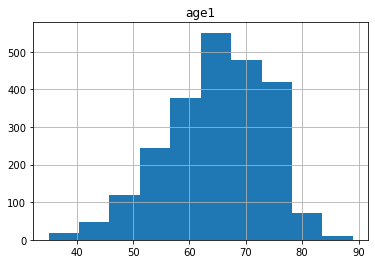

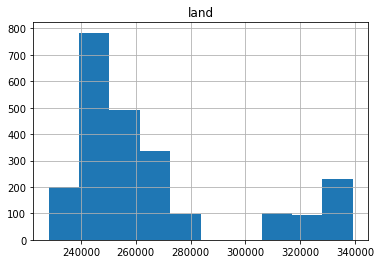

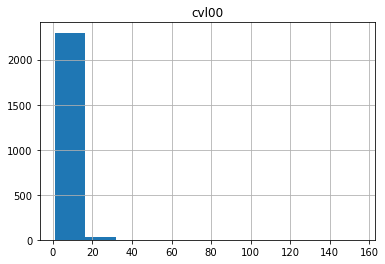

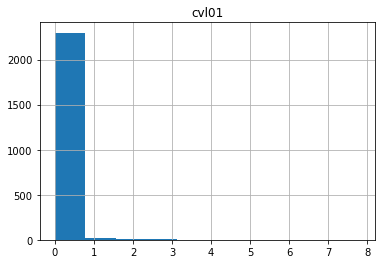

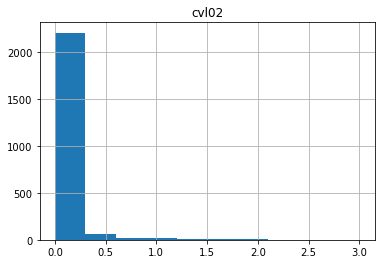

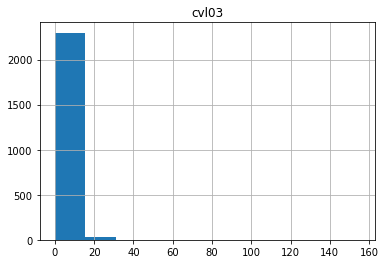

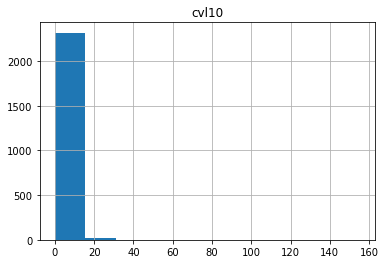

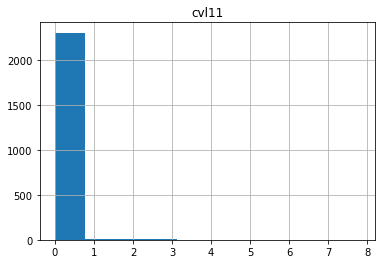

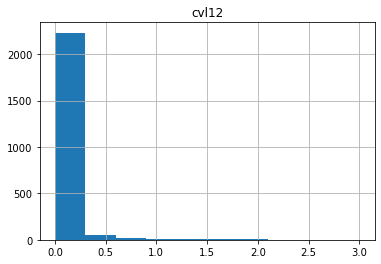

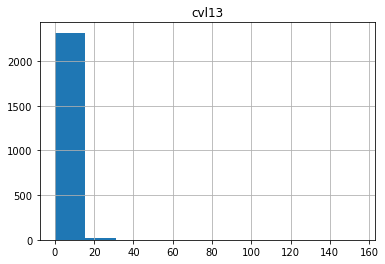

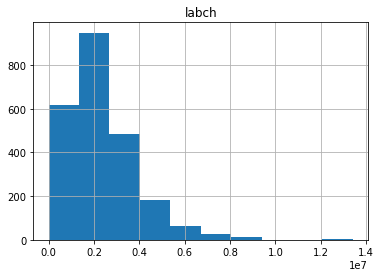

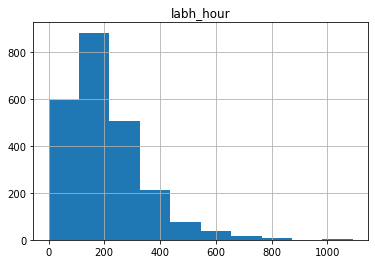

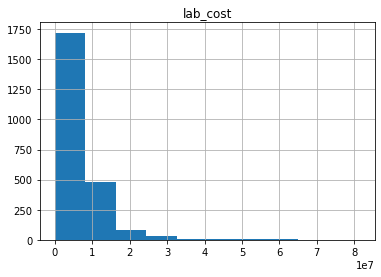

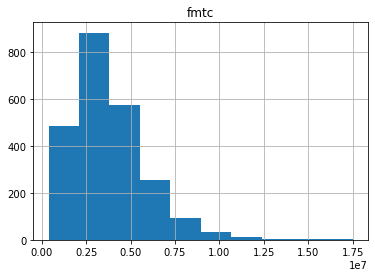

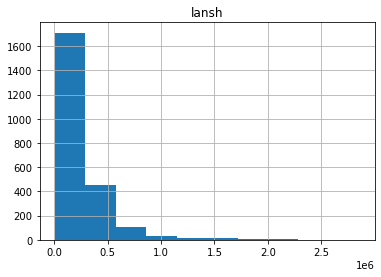

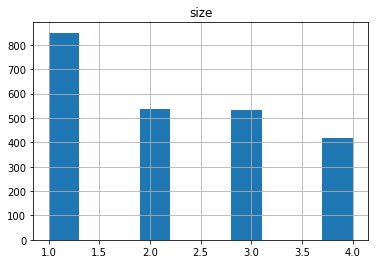

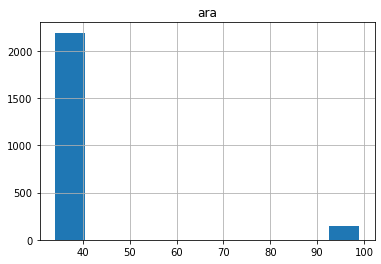

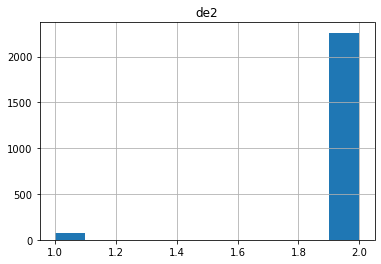

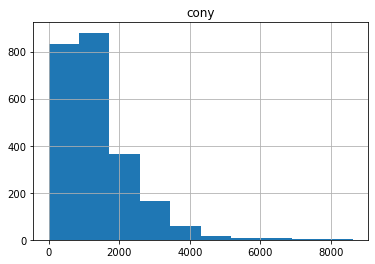

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

for column in data.columns:
    data[column].hist()
    plt.title(column)
    plt.show()

## Log Transform

In [5]:
data.loc[:, ['cvl00', 'cvl01', 'cvl02', 'cvl03', 'cvl10', 'cvl11', 'cvl12', 'cvl13']] = np.log1p(data.loc[:, ['cvl00', 'cvl01', 'cvl02', 'cvl03', 'cvl10', 'cvl11', 'cvl12', 'cvl13']])
data.loc[:, ['fmtc', 'lansh']] = np.log1p(data.loc[:, ['fmtc', 'lansh']])
data.loc[:, ['labch', 'labh_hour', 'lab_cost']] = np.log1p(data.loc[:, ['labch', 'labh_hour', 'lab_cost']])

In [6]:
data['cony'] = np.log1p(data['cony'])

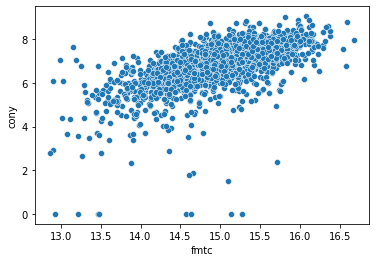

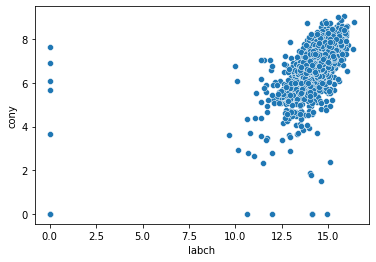

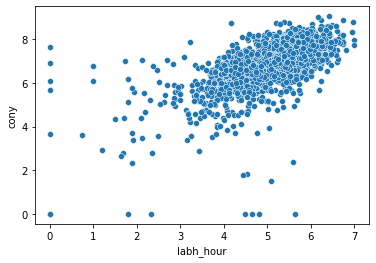

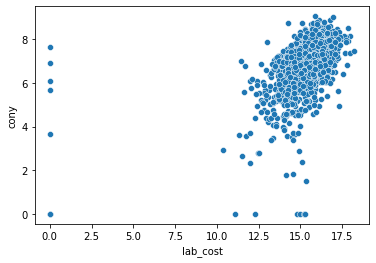

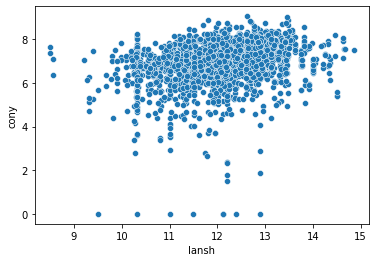

In [7]:
import seaborn as sns

sns.scatterplot(x='fmtc', y='cony', data=data)
plt.show()

sns.scatterplot(x='labch', y='cony', data=data)
plt.show()

sns.scatterplot(x='labh_hour', y='cony', data=data)
plt.show()

sns.scatterplot(x='lab_cost', y='cony', data=data)
plt.show()

sns.scatterplot(x='lansh', y='cony', data=data)
plt.show()

## NaN Check

In [8]:
data.replace({'labch' : {0 : np.nan},
              'labh_hour' : {0 : np.nan},
              'lab_cost' : {0 : np.nan},
              'lansh' : {0 : np.nan}},
             inplace=True)

In [9]:
data.isnull().sum()

age1         0
land         0
cvl00        0
cvl01        0
cvl02        0
cvl03        0
cvl10        0
cvl11        0
cvl12        0
cvl13        0
labch        7
labh_hour    7
lab_cost     7
fmtc         0
lansh        0
size         0
ara          0
de2          0
cony         0
dtype: int64

In [10]:
data.dropna(axis=0, inplace=True)

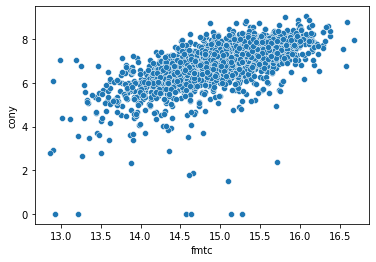

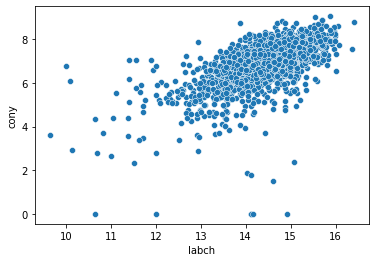

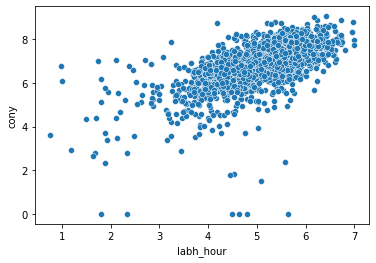

In [11]:
sns.scatterplot(x='fmtc', y='cony', data=data)
plt.show()

sns.scatterplot(x='labch', y='cony', data=data)
plt.show()

sns.scatterplot(x='labh_hour', y='cony', data=data)
plt.show()

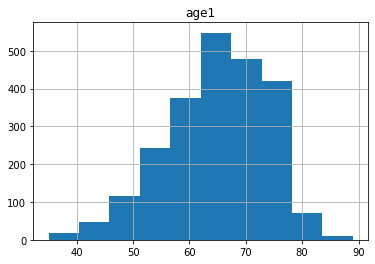

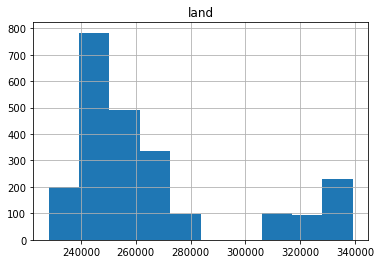

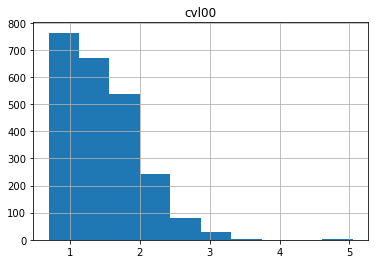

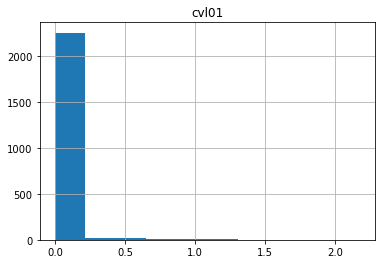

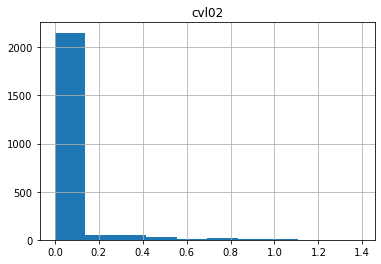

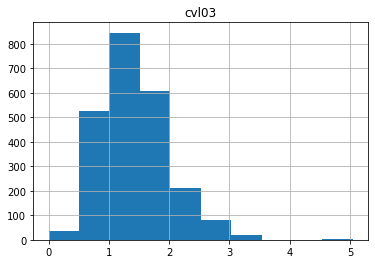

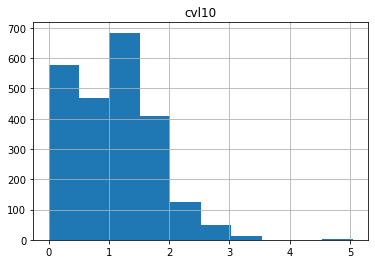

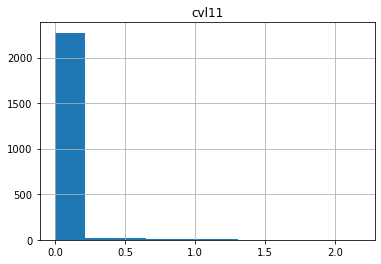

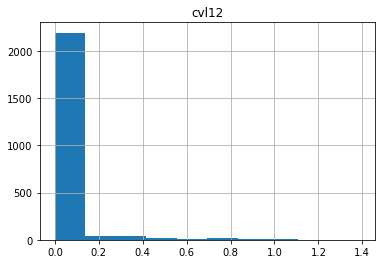

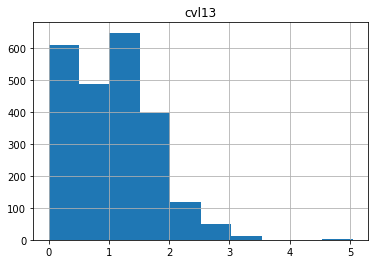

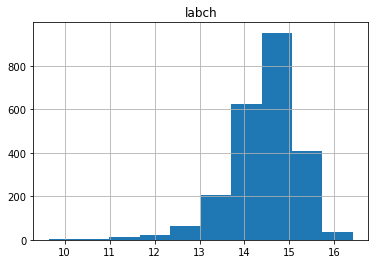

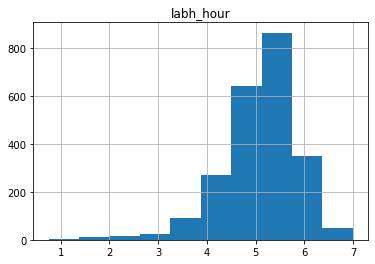

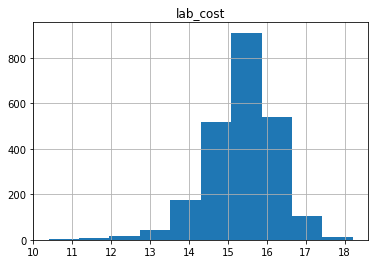

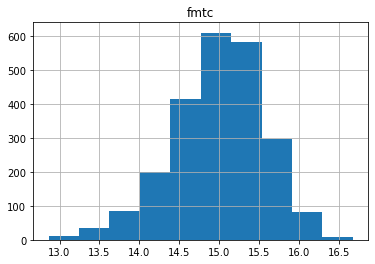

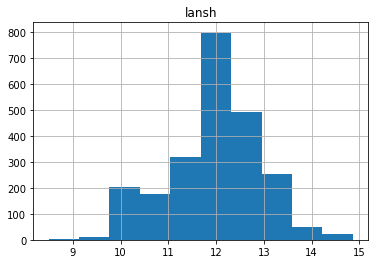

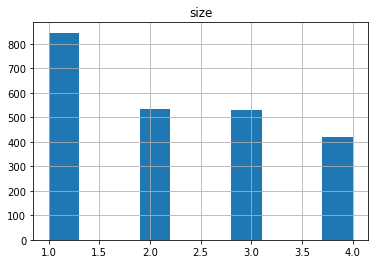

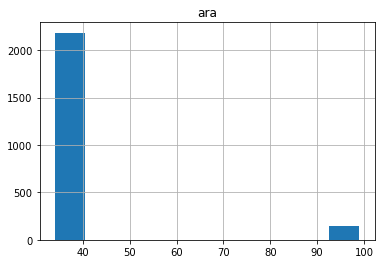

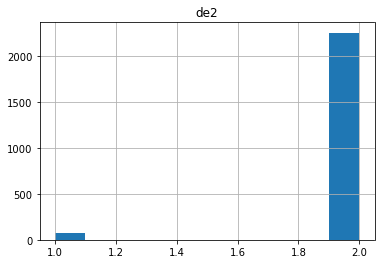

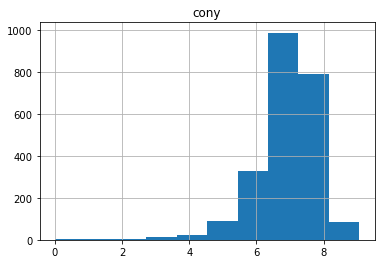

In [12]:
for column in data.columns:
    data[column].hist()
    plt.title(column)
    plt.show()

## Categorical Variable processing

In [13]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['size', 'ara', 'de2']
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(data.loc[:, categorical_variables])
onehot = onehot_encoder.fit_transform(data.loc[:, categorical_variables])
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([1, 2, 3, 4]), array([34, 36, 38, 99]), array([1, 2])]
(2329, 10)


## Numerical Variable processing

In [14]:
from sklearn.preprocessing import MinMaxScaler

numerical_variables = ['age1',
                       'land', 
                       'cvl00', 'cvl01', 'cvl02', 'cvl03',
                       'cvl10', 'cvl11', 'cvl12', 'cvl13',
                       'labch', 'labh_hour', 'lab_cost',
                       'fmtc', 'lansh']
X_minmax_scaler = MinMaxScaler()
X_minmax_scaler.fit(data.loc[:, numerical_variables])
X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
X_scaled

array([[0.64814815, 0.8329955 , 0.53462995, ..., 0.85148156, 0.53296181,
        0.51056193],
       [0.59259259, 0.8329955 , 0.35275876, ..., 0.60291362, 0.61636206,
        0.37381782],
       [0.55555556, 0.8329955 , 0.00566772, ..., 0.44803629, 0.48637286,
        0.6126814 ],
       ...,
       [0.42592593, 0.181128  , 0.28754801, ..., 0.82603511, 0.6681195 ,
        0.69149598],
       [0.61111111, 0.181128  , 0.42963674, ..., 0.93789564, 0.69815865,
        0.68344753],
       [0.62962963, 0.181128  , 0.31819762, ..., 0.85113607, 0.67645926,
        0.68344753]])

In [15]:
numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,age1,land,cvl00,cvl01,cvl02,cvl03,cvl10,cvl11,cvl12,cvl13,...,0,1,2,3,4,5,6,7,8,9
0,0.648148,0.832995,0.534630,0.0,0.0,0.598507,0.598507,0.0,0.0,0.598507,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.592593,0.832995,0.352759,0.0,0.0,0.441600,0.181449,0.0,0.0,0.181449,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.555556,0.832995,0.005668,0.0,0.0,0.142151,0.142151,0.0,0.0,0.142151,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.592593,0.832995,0.226276,0.0,0.0,0.332478,0.066630,0.0,0.0,0.066630,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.629630,0.832995,0.017665,0.0,0.0,0.152501,0.152501,0.0,0.0,0.152501,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,0.759259,0.351648,0.287548,0.0,0.0,0.385340,0.385340,0.0,0.0,0.385340,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2325,0.537037,0.351648,0.347769,0.0,0.0,0.437295,0.274522,0.0,0.0,0.274522,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2326,0.425926,0.181128,0.287548,0.0,0.0,0.385340,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2327,0.611111,0.181128,0.429637,0.0,0.0,0.507925,0.507925,0.0,0.0,0.507925,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [16]:
X_data = np.array(X_data_df)
y_data = np.array(data['cony'])

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.1,
                                                    random_state=1234)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2096, 25) (2096,)
(233, 25) (233,)


# Modeling

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(random_state=1000)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1000)

In [19]:
dt_pred = dt.predict(X_test)
print(dt_pred[:10])

[7.10859479 6.21993835 7.42280832 6.97909489 8.36194191 6.2500312
 7.07249161 7.49498065 7.08142843 3.56904691]


In [20]:
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_rmse

1.1019291538059708

## RandomForest

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 3000, max_features = 'sqrt', 
                           random_state = 1000)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=3000, random_state=1000)

In [22]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[7.20032247 6.50100893 6.38448504 6.37474431 7.85094994 6.33837615
 7.16297224 7.18637928 7.52501586 4.41343614]


In [23]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_rmse

0.6738304661975482

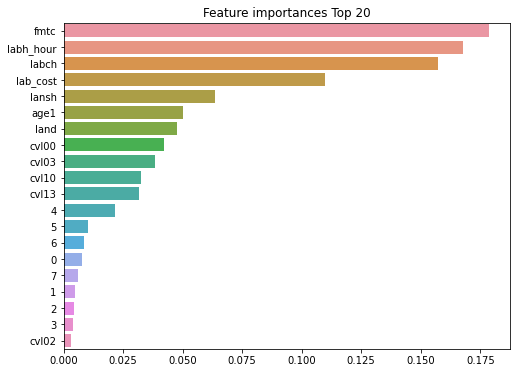

In [24]:
import seaborn as sns

importances_values = rf.feature_importances_ 
importances = pd.Series(importances_values, index=X_data_df.columns)

top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

## Ridge

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1724)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1724)

In [34]:
print(ridge.score(X_train, y_train))

0.45497713169744036


In [35]:
ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_rmse

0.6952304373814484

## LASSO

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [37]:
print(lasso.score(X_train, y_train))

0.45305826640989844


In [38]:
lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_rmse

0.6900496876475627

## GBM

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=500, max_depth=8)
gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)
print(gbm_pred[:10])

[7.30735211 6.3744601  6.80531673 6.40544047 7.78595763 6.49681265
 7.17442752 6.72611267 7.66486191 4.59070182]


In [40]:
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_pred))
gbm_rmse

0.7016605993651612

## AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 500, learning_rate = 0.1)
ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)
print(ada_pred[:10])

[7.08477938 6.16257202 6.08117186 6.05571339 7.54821363 6.14598572
 7.14563821 6.96243941 7.53313482 5.30506977]


In [42]:
ada_rmse = np.sqrt(mean_squared_error(y_test, ada_pred))
ada_rmse

0.7574380039379682

## XGBoost

In [43]:
import xgboost as xgb
print(xgb.__version__)

xgb_reg = xgb.XGBRegressor(learning_rate=0.08, max_depth=8, 
                           gamma=0, n_estimators=3000,
                           subsample=0.7, colsample_bytree=0.8)
xgb_reg.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_reg.predict(X_test)
print(xgb_pred[:10])

1.3.3
[7.261648  6.562728  6.4919853 6.5049353 7.9381824 6.6582756 7.381413
 7.354301  7.515667  4.2871633]


In [44]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_rmse

0.6826519190743018

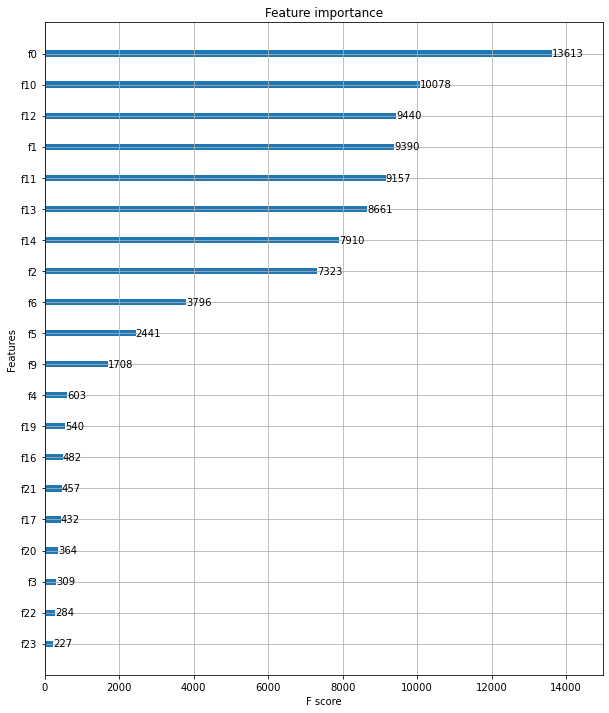

In [45]:
from xgboost import plot_importance

plot_importance(xgb_reg, max_num_features=20)

fig = plt.gcf()
fig.set_size_inches(10, 12)

## LightGBM

In [46]:
import lightgbm as lgb


lgb_reg = lgb.LGBMRegressor(n_estimators=1000, max_depth=50, num_leaves=10, min_data_in_leaf=10)
lgb_reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000,
        verbose = False)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


LGBMRegressor(max_depth=50, min_data_in_leaf=10, n_estimators=1000,
              num_leaves=10)

In [47]:
lgb_pred = lgb_reg.predict(X_test)
print(lgb_pred[:10])

[7.25112841 6.63173308 6.40004071 6.18462869 7.68858275 6.26756491
 7.14824006 6.99078193 7.68006136 4.13206278]


In [48]:
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
lgb_rmse

0.6819225454486603

# Model Comparison

In [49]:
model_result = pd.DataFrame({
    'Model': ['Decision Tree', 'RandomForest', 'Ridge', 'LASSO',
              'GBM', 'AdaBoost', 'XGboost', 'LightGBM'],
    'RMSE': [dt_rmse, rf_rmse, ridge_rmse, lasso_rmse,
             gbm_rmse, ada_rmse, xgb_rmse, lgb_rmse]})
model_result.sort_values(by='RMSE', ascending=True)

,Model,RMSE
1,RandomForest,0.673830
7,LightGBM,0.681923
6,XGboost,0.682652
3,LASSO,0.690050
2,Ridge,0.695230
4,GBM,0.701661
5,AdaBoost,0.757438
0,Decision Tree,1.101929


# Ensemble

In [50]:
import torch
from sklearn.metrics import mean_squared_error

class EnsembleRegressor:
    def __init__(self, models, weights=None):
        
        self.models = models
        self.weights = weights
        
    def predict(self, X_test):
        pred_list = []
        for i, model in enumerate(models.values()):
            pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)
            
        prediction = np.average(preds, axis=0, weights=self.weights)

        return prediction
    
    def random_search(self, X_test, y_test, num_search):
        weights = torch.softmax(torch.rand(num_search, len(self.models)), axis=1).numpy()
        
        pred_list = []
        for i, model in enumerate(models.values()):
            pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)

        mse = []
        for i in range(num_search):
            prediction = np.average(preds, axis=0, weights=weights[i])
            mse_ = mean_squared_error(y_test, prediction)
            mse.append(mse_)
        
        result = pd.DataFrame(weights)
        result['RMSE'] = np.sqrt(mse)

        return result.sort_values('RMSE', ascending=True)

In [51]:
models = {'RandomForest' : rf, 'XGBoost' : xgb_reg, 'LightGBM' : lgb_reg}

ensemble = EnsembleRegressor(models, weights=None)
result = ensemble.random_search(X_test, y_test, 30000)
result.head(10)

,0,1,2,RMSE
10448,0.332144,0.382886,0.284970,0.668073
13186,0.333064,0.381968,0.284968,0.668073
27361,0.331391,0.383525,0.285083,0.668073
3767,0.333788,0.381429,0.284783,0.668073
7850,0.329434,0.382528,0.288038,0.668073
1868,0.328628,0.383516,0.287856,0.668073
29361,0.330353,0.381683,0.287965,0.668073
24431,0.329756,0.384163,0.286081,0.668073
28018,0.328780,0.384503,0.286717,0.668073
20835,0.327986,0.383092,0.288922,0.668073


In [52]:
optimal_weight = np.round(result.iloc[0,:-1], 3).tolist()
print(optimal_weight)

[0.332, 0.383, 0.285]


In [53]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[7.23828991 6.56190369 6.43009102 6.3704245  7.83808531 6.44071644
 7.24243637 7.19494804 7.5656232  4.28488222]


In [54]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

0.6680730135873509

# Evaluation

In [55]:
inverse_transformed_pred = np.expm1(preds)
inverse_transformed_pred = np.where(inverse_transformed_pred < 0, 0, inverse_transformed_pred)
inverse_transformed_y_test = np.expm1(y_test)

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[1390.71198112  706.61749668  619.23039577  583.30581141 2534.34577362
  625.85574279 1396.49464642 1331.68108309 1929.67159577   71.59399598]
[ 525.          732.          441.          891.42156863 1981.08108108
  563.125      2221.47651007 1273.33333333 1710.66666667  440.        ]


In [56]:
np.sqrt(mean_squared_error(inverse_transformed_y_test, inverse_transformed_pred))

745.3759756234958

In [57]:
inverse_transformed_pred = pd.Series(np.round(inverse_transformed_pred,1), name='예측값')
inverse_transformed_y_test= pd.Series(np.round(inverse_transformed_y_test,1), name='생산량')
result = pd.concat([inverse_transformed_y_test, inverse_transformed_pred], axis=1)
result[:30]

,생산량,예측값
0,525.0,1390.7
1,732.0,706.6
2,441.0,619.2
3,891.4,583.3
4,1981.1,2534.3
5,563.1,625.9
6,2221.5,1396.5
7,1273.3,1331.7
8,1710.7,1929.7
9,440.0,71.6


# 2018-2019 Prediction

In [60]:
import os
import pandas as pd
import numpy as np


def load_data(path):
    years = [2018, 2019]
    use_cols = ['age1',
                'land', 
                'cvl00', 'cvl01', 'cvl02', 'cvl03',
                'cvl10', 'cvl11', 'cvl12', 'cvl13',
                'labch', 'labh_hour', 'lab_cost',
                'fmtc', 'lansh',
                'size', 'ara', 'de2',# catecorical variable
                'cony'] # dependent variable

    dataframe_list = []
    
    # 2018
    file_path1 = os.path.join(path, str(years[0])+'년', str(years[0])+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀 1).xls')
    file_path2 = os.path.join(path, str(years[0])+'년', str(years[0])+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀 2).xls')
    forest_data1 = pd.read_excel(file_path1)
    forest_data2 = pd.read_excel(file_path2)
    forest_2018 = pd.concat([forest_data1, forest_data2], axis=1)
    dataframe_list.append(forest_2018.loc[:,use_cols])
    print(2018, forest_2018.shape)

    # 2019
    file_path = os.path.join(path, str(years[1])+'년', str(years[1])+'년 임산물생산비조사_통합 데이터_1. 밤.xlsx')
    forest_2019 = pd.read_excel(file_path)
    dataframe_list.append(forest_2019.loc[:,use_cols])
    print(2019, forest_2019.shape)
    
    data = pd.concat(dataframe_list, axis=0)
    
    return data
    
data = load_data('./임산물생산비조사 마이크로데이터(2010-2019)')

2018 (231, 416)
2019 (226, 432)


In [62]:
data.loc[:, ['cvl00', 'cvl01', 'cvl02', 'cvl03', 'cvl10', 'cvl11', 'cvl12', 'cvl13']] = np.log1p(data.loc[:, ['cvl00', 'cvl01', 'cvl02', 'cvl03', 'cvl10', 'cvl11', 'cvl12', 'cvl13']])
data.loc[:, ['fmtc', 'lansh']] = np.log1p(data.loc[:, ['fmtc', 'lansh']])
data.loc[:, ['labch', 'labh_hour', 'lab_cost']] = np.log1p(data.loc[:, ['labch', 'labh_hour', 'lab_cost']])

In [63]:
data['cony'] = np.log1p(data['cony'])

In [64]:
data.replace({'labch' : {0 : np.nan},
              'labh_hour' : {0 : np.nan},
              'lab_cost' : {0 : np.nan},
              'lansh' : {0 : np.nan}},
             inplace=True)

In [77]:
if data.isnull().sum().sum() > 0:
    data.fillna(df.mean(), inplace=True)

In [67]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['size', 'ara', 'de2']
onehot = onehot_encoder.transform(data.loc[:, categorical_variables])
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([1, 2, 3, 4]), array([34, 36, 38, 99]), array([1, 2])]
(457, 10)


In [68]:
from sklearn.preprocessing import MinMaxScaler

numerical_variables = ['age1',
                       'land', 
                       'cvl00', 'cvl01', 'cvl02', 'cvl03',
                       'cvl10', 'cvl11', 'cvl12', 'cvl13',
                       'labch', 'labh_hour', 'lab_cost',
                       'fmtc', 'lansh']
X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
X_scaled

array([[0.61111111, 0.32314213, 0.05121838, ..., 0.55895445, 0.52268493,
        0.50506695],
       [0.57407407, 0.32314213, 0.01659984, ..., 0.54532211, 0.66767472,
        0.75737545],
       [0.40740741, 0.32314213, 0.39129264, ..., 0.68666586, 0.57492137,
        0.78247559],
       ...,
       [0.42592593, 0.181128  , 0.28754801, ..., 0.82603511, 0.6681195 ,
        0.69149598],
       [0.61111111, 0.181128  , 0.42963674, ..., 0.93789564, 0.69815865,
        0.68344753],
       [0.62962963, 0.181128  , 0.31819762, ..., 0.85113607, 0.67645926,
        0.68344753]])

In [69]:
numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,age1,land,cvl00,cvl01,cvl02,cvl03,cvl10,cvl11,cvl12,cvl13,...,0,1,2,3,4,5,6,7,8,9
0,0.611111,0.323142,0.051218,0.0,0.205713,0.153416,0.181449,0.0,0.205713,0.153416,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.574074,0.323142,0.016600,0.0,0.000000,0.151582,0.151582,0.0,0.000000,0.151582,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.407407,0.323142,0.391293,0.0,0.000000,0.474844,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.388889,0.237572,0.193166,0.0,0.000000,0.303913,0.303913,0.0,0.000000,0.303913,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.351852,0.237572,0.216209,0.0,0.555516,0.273031,0.290676,0.0,0.227088,0.273031,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0.759259,0.351648,0.287548,0.0,0.000000,0.385340,0.385340,0.0,0.000000,0.385340,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
453,0.537037,0.351648,0.347769,0.0,0.000000,0.437295,0.274522,0.0,0.000000,0.274522,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
454,0.425926,0.181128,0.287548,0.0,0.000000,0.385340,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
455,0.611111,0.181128,0.429637,0.0,0.000000,0.507925,0.507925,0.0,0.000000,0.507925,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [70]:
X_test = np.array(X_data_df)
y_test = np.array(data['cony'])

In [71]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[6.92933739 6.84348159 6.72485797 6.59888092 6.00428493 6.2282798
 7.39716449 6.28837366 7.00982106 7.78025631]


In [72]:
inverse_transformed_pred = np.expm1(preds)
inverse_transformed_pred = np.where(inverse_transformed_pred < 0, 0, inverse_transformed_pred)
inverse_transformed_y_test = np.expm1(y_test)

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[1020.81669024  936.74831381  831.85368189  733.27301967  404.16116497
  505.88279247 1630.35215557  537.27719551 1106.45631772 2391.88805493]
[1143.33333333  851.30434783  378.85714286  805.47112462  392.83819629
  550.         1568.18181818  602.48681236 1171.875      2809.33333333]


In [73]:
print(np.sqrt(mean_squared_error(inverse_transformed_y_test, inverse_transformed_pred)))

541.7373200749496

In [74]:
inverse_transformed_pred = pd.Series(np.round(inverse_transformed_pred,1), name='예측값')
inverse_transformed_y_test= pd.Series(np.round(inverse_transformed_y_test,1), name='생산량')
result = pd.concat([inverse_transformed_y_test, inverse_transformed_pred], axis=1)
result[:30]

,생산량,예측값
0,1143.3,1020.8
1,851.3,936.7
2,378.9,831.9
3,805.5,733.3
4,392.8,404.2
5,550.0,505.9
6,1568.2,1630.4
7,602.5,537.3
8,1171.9,1106.5
9,2809.3,2391.9
